In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import load_model

# For reproducibility
np.random.seed(120)


In [2]:
# Define paths
data_dir = "../../data/sentiment_analysis/processed/"
model_dir = "../../models/sentiment_analysis/"
history1_path = model_dir + "history1.npy"
history2_path = model_dir + "history2.npy"
model1_path = model_dir + "model1_cnn.keras"
model2_path = model_dir + "model2_bi_lstm.keras"

# Load test data
X_test = np.load(data_dir + "X_test.npy")
y_test = np.load(data_dir + "y_test.npy")

print("Test data loaded successfully!")


Test data loaded successfully!


In [3]:
# Load trained models
model1 = load_model(model1_path)
model2 = load_model(model2_path)

print("Models loaded successfully!")


Models loaded successfully!


In [4]:
# Load training histories
history1 = np.load(history1_path, allow_pickle=True).item()
history2 = np.load(history2_path, allow_pickle=True).item()

print("Training histories loaded successfully!")


Training histories loaded successfully!


In [5]:
# Generate predictions
y_pred1 = np.argmax(model1.predict(X_test), axis=-1)
y_pred2 = np.argmax(model2.predict(X_test), axis=-1)

print("Predictions generated successfully!")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Predictions generated successfully!


In [6]:
# Compute accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f"Model 1 (CNN) Accuracy: {accuracy1:.2%}")
print(f"Model 2 (Bi-LSTM) Accuracy: {accuracy2:.2%}")


Model 1 (CNN) Accuracy: 78.31%
Model 2 (Bi-LSTM) Accuracy: 76.05%


In [7]:
# Define class names
class_names = ["Bearish", "Bullish", "Neutral"]

# Generate classification reports
report1 = classification_report(y_test, y_pred1, target_names=class_names)
report2 = classification_report(y_test, y_pred2, target_names=class_names)

print("Model 1 Classification Report:")
print(report1)

print("\nModel 2 Classification Report:")
print(report2)


Model 1 Classification Report:
              precision    recall  f1-score   support

     Bearish       0.59      0.60      0.60       179
     Bullish       0.70      0.62      0.66       240
     Neutral       0.85      0.88      0.86       775

    accuracy                           0.78      1194
   macro avg       0.71      0.70      0.71      1194
weighted avg       0.78      0.78      0.78      1194


Model 2 Classification Report:
              precision    recall  f1-score   support

     Bearish       0.52      0.58      0.54       179
     Bullish       0.68      0.54      0.60       240
     Neutral       0.84      0.87      0.85       775

    accuracy                           0.76      1194
   macro avg       0.68      0.66      0.67      1194
weighted avg       0.76      0.76      0.76      1194



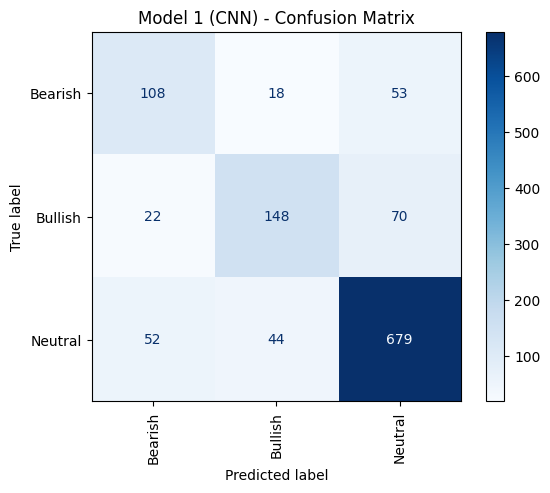

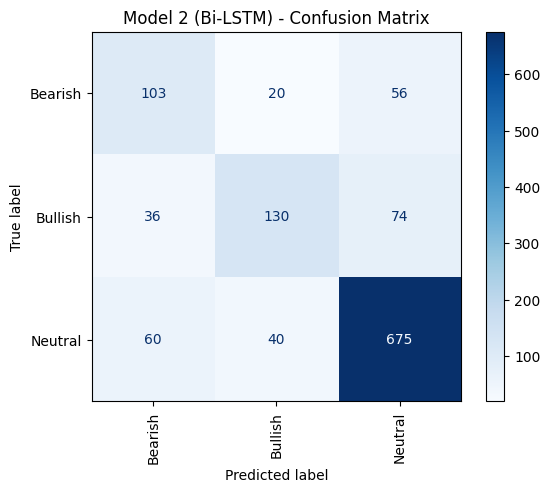

In [8]:
# Compute confusion matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix for Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names)
disp1.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Model 1 (CNN) - Confusion Matrix")
plt.show()

# Plot confusion matrix for Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
disp2.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Model 2 (Bi-LSTM) - Confusion Matrix")
plt.show()


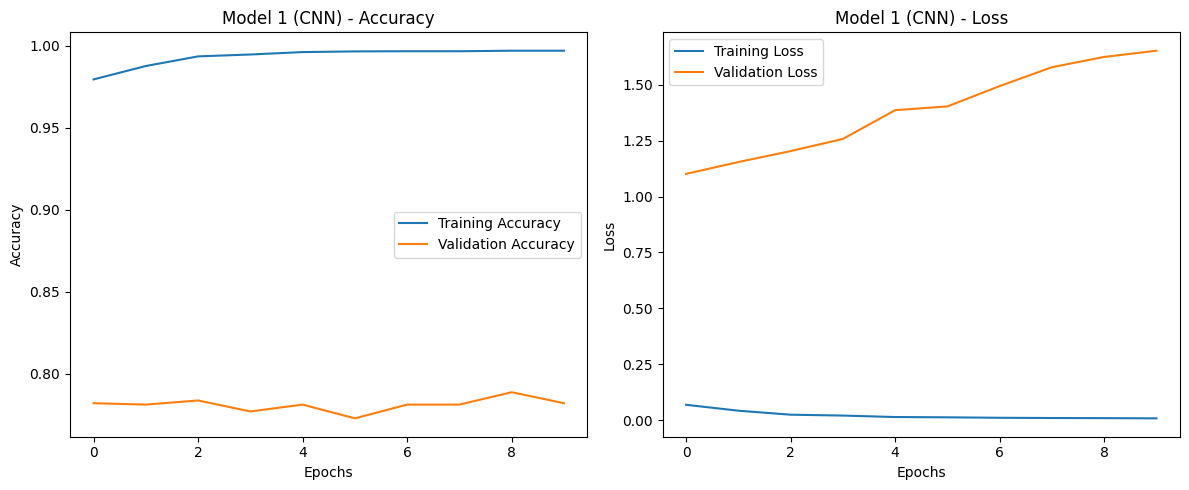

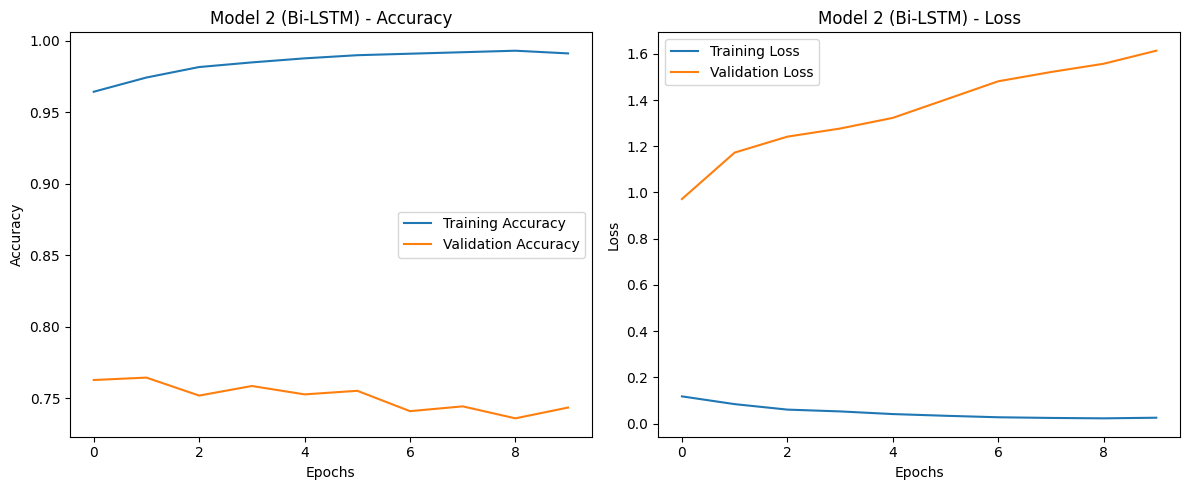

In [9]:
# Helper function to plot metrics
def plot_metrics(history, model_name):
    # Plot training/validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training/validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for both models
plot_metrics(history1, "Model 1 (CNN)")
plot_metrics(history2, "Model 2 (Bi-LSTM)")


In [19]:
def predict_with_threshold(model, X, threshold=0.7):
    """
    Returns class predictions or -1 if no class passes the threshold.
    """
    probabilities = model.predict(X)
    max_probs = np.max(probabilities, axis=1)
    class_indices = np.argmax(probabilities, axis=1)
    # Mark as uncertain (-1) if max probability < threshold
    predictions = np.where(max_probs < threshold, -1, class_indices)
    return predictions

# Generate predictions with threshold
y_pred1_threshold = predict_with_threshold(model1, X_test)
y_pred2_threshold = predict_with_threshold(model2, X_test)

# Compute accuracy with threshold
accuracy1_threshold = accuracy_score(y_test, y_pred1_threshold)
accuracy2_threshold = accuracy_score(y_test, y_pred2_threshold)

print(f"Model 1 (CNN) Accuracy with threshold: {accuracy1_threshold:.2%}")
print(f"Model 2 (Bi-LSTM) Accuracy with threshold: {accuracy2_threshold:.2%}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Model 1 (CNN) Accuracy with threshold: 76.05%
Model 2 (Bi-LSTM) Accuracy with threshold: 73.12%


In [11]:
# Save classification reports to text files
with open("../../reports/sentiment_analysis/sentiment_model1_report.txt", 'w') as f:
    f.write(report1)

with open("../../reports/sentiment_analysis/sentiment_model2_report.txt", 'w') as f:
    f.write(report2)

print("Classification reports saved successfully!")


Classification reports saved successfully!


### Summary of Model Evaluation

1. **Model Accuracy:**
   - Model 1 (CNN): 78.31%
   - Model 2 (Bi-LSTM): 76.05%


2. **Training Analysis:**
   - Model 1 showed faster convergence but slightly overfitted the training data.
   - Model 2 maintained stable training but underperformed on validation accuracy.

---

### Next Steps
- Reflect on the findings and explore ways to improve model performance (e.g., hyperparameter tuning, adding more data).
- Proceed to `5_summary_and_reflection.ipynb` for a comprehensive project summary.
